In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#### Twitter API Credentials

In [2]:
consumer_key= "your_consumer_key"    
consumer_secret= "your_consumer_key_secret"
access_token= "your_access_token"    
access_token_secret= "your_access_token_secret"

#### Authentication Object and Access Tokens

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

#### Extract 200 tweets from amazon's twitter account
#### Print The Last 5 tweets from the account

In [4]:
posts = api.user_timeline(screen_name="elonmusk", count= 200, lang="en", tweet_mode="extended")

print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i + 1

Unexpected parameter: lang


Show the 5 recent tweets: 

1) @BillyM2k Maybe this year isn’t out of the question …

2) @BillyM2k Haha that’s next year

3) SpaceX Falcon 🚀 team is making excellent progress – aiming for 60 launches this year!

4) RT @SpaceX: Payloads for our upcoming fourth dedicated smallsat rideshare mission – Transporter-4 – were encapsulated into Falcon 9’s fairi…

5) We’ve all been there



#### Creating a  dataframe with a column called Tweets and Showing the first 5 rows of the data

In [5]:
dframe = pd.DataFrame ( [tweet.full_text for tweet in posts], columns=['Tweets'])

dframe.head()

,Tweets
0,@BillyM2k Maybe this year isn’t out of the que...
1,@BillyM2k Haha that’s next year
2,SpaceX Falcon 🚀 team is making excellent progr...
3,RT @SpaceX: Payloads for our upcoming fourth d...
4,We’ve all been there


#### Cleaning the text

In [6]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removing @mentions
    text = re.sub(r'#','', text) #Removing the # symbol
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) # Removing the Hyper Link
    
    return text

dframe['Tweets'] = dframe['Tweets'].apply(cleanTxt)
dframe

,Tweets
0,Maybe this year isn’t out of the question …
1,Haha that’s next year
2,SpaceX Falcon 🚀 team is making excellent progr...
3,: Payloads for our upcoming fourth dedicated s...
4,We’ve all been there
5,
6,Covid-19 is the virus of Theseus.\n\nHow many ...
7,The Washington Post’s current slogan is “Demo...
8,"Ah yes, I see they decided to editorialize. H..."
9,tick tock


#### Creating a function to get the subjectivity and polarity

In [7]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

dframe['Subjectivity'] = dframe['Tweets'].apply(getSubjectivity)
dframe['Polarity'] = dframe['Tweets'].apply(getPolarity)

dframe

,Tweets,Subjectivity,Polarity
0,Maybe this year isn’t out of the question …,0.000000,0.000000
1,Haha that’s next year,0.150000,0.100000
2,SpaceX Falcon 🚀 team is making excellent progr...,1.000000,1.000000
3,: Payloads for our upcoming fourth dedicated s...,0.000000,0.000000
4,We’ve all been there,0.000000,0.000000
5,,0.000000,0.000000
6,Covid-19 is the virus of Theseus.\n\nHow many ...,0.500000,0.500000
7,The Washington Post’s current slogan is “Demo...,0.644444,0.312500
8,"Ah yes, I see they decided to editorialize. H...",0.100000,0.000000
9,tick tock,0.000000,0.000000


#### Ploting the wordcloud

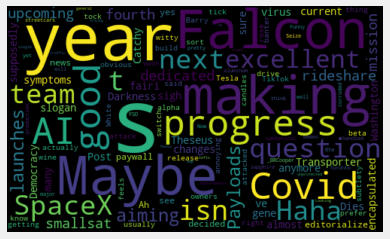

In [8]:
allWords = ' '.join([twts for twts in dframe['Tweets']])
wordCloud = WordCloud(width= 500, height= 300,  random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

#### Creating a function to Compute the negative, neutral and positive analysis

In [9]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
dframe['Analysis'] = dframe['Polarity'].apply(getAnalysis)

dframe

,Tweets,Subjectivity,Polarity,Analysis
0,Maybe this year isn’t out of the question …,0.000000,0.000000,Neutral
1,Haha that’s next year,0.150000,0.100000,Positive
2,SpaceX Falcon 🚀 team is making excellent progr...,1.000000,1.000000,Positive
3,: Payloads for our upcoming fourth dedicated s...,0.000000,0.000000,Neutral
4,We’ve all been there,0.000000,0.000000,Neutral
5,,0.000000,0.000000,Neutral
6,Covid-19 is the virus of Theseus.\n\nHow many ...,0.500000,0.500000,Positive
7,The Washington Post’s current slogan is “Demo...,0.644444,0.312500,Positive
8,"Ah yes, I see they decided to editorialize. H...",0.100000,0.000000,Neutral
9,tick tock,0.000000,0.000000,Neutral


#### Print all of the positive tweets

In [10]:
j=1
sortedDFrame = dframe.sort_values(by=['Polarity'])
for i in range(0, sortedDFrame.shape[0]):
    if(sortedDFrame['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDFrame['Tweets'][i])
        print()
        j = j + 1

1)  Haha that’s next year

2) SpaceX Falcon 🚀 team is making excellent progress – aiming for 60 launches this year!

3) Covid-19 is the virus of Theseus.

How many gene changes before it’s not Covid-19 anymore?

I supposedly have it again (sigh), but almost no symptoms.

4)  The Washington Post’s current slogan is “Democracy Dies in Darkness”. Catchy – for sure – but then what’s up with the paywall for news!?

5)  I usually drive an alpha build, but switch to beta right before release so I know what Tesla owners are getting

6)  TikTok feels like such an obvious AI attack that it’s annoying. 

I prefer to be attacked by AI with subtlety – maybe a rose, some candles, wine, Barry White, witty banter, that sort of thing …

7)  Funny to think that sapphire is just corroded aluminum!

8)  This is pretty good. 10.12 will have major improvements for tricky unprotected lefts &amp; heavy traffic in general. We’re also making good progress with single stack.



#### Print The Negative Tweets

In [11]:
j=1
sortedDFrame = dframe.sort_values(by=['Polarity'])
for i in range(0, sortedDFrame.shape[0]):
    if(sortedDFrame['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDFrame['Tweets'][i])
        print()
        j = j+1

#### Plotting the Polarity and Subjectivity 

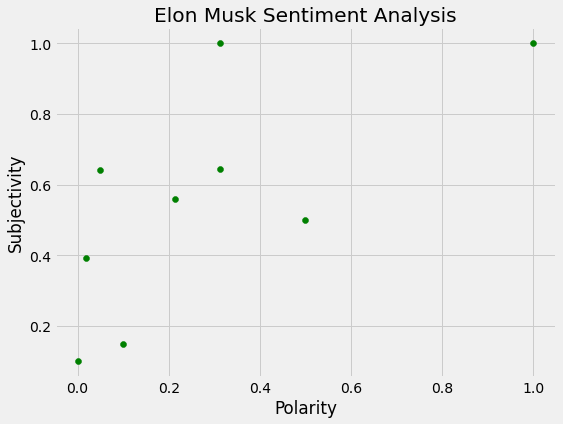

In [12]:
plt.figure(figsize=(8,6))
for i in range(0, dframe.shape[0]):
    plt.scatter(dframe['Polarity'][i], dframe['Subjectivity'][i], color='Green')
    
plt.title('Elon Musk Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

#### Get The Percentages of Positive Tweets

In [13]:
ptweets = dframe[dframe.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round ( (ptweets.shape[0] / dframe.shape[0]) * 100, 1)

38.1

#### Get Percentage of Negative Tweets

In [14]:
ntweets = dframe[dframe.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round ( (ntweets.shape[0] / dframe.shape[0]) * 100, 1)

0.0

#### Show the Value Counts

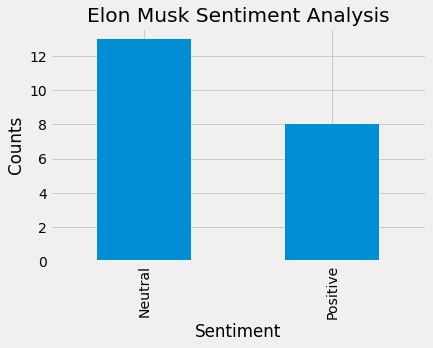

In [15]:
dframe['Analysis'].value_counts()

plt.title('Elon Musk Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dframe['Analysis'].value_counts().plot(kind='bar')
plt.show()
